Prerequisite

In [ ]:
!pip install scipy
from google.colab import drive
drive.mount('/content/drive')

Homework code



Let's list all the dataset columns.
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verific

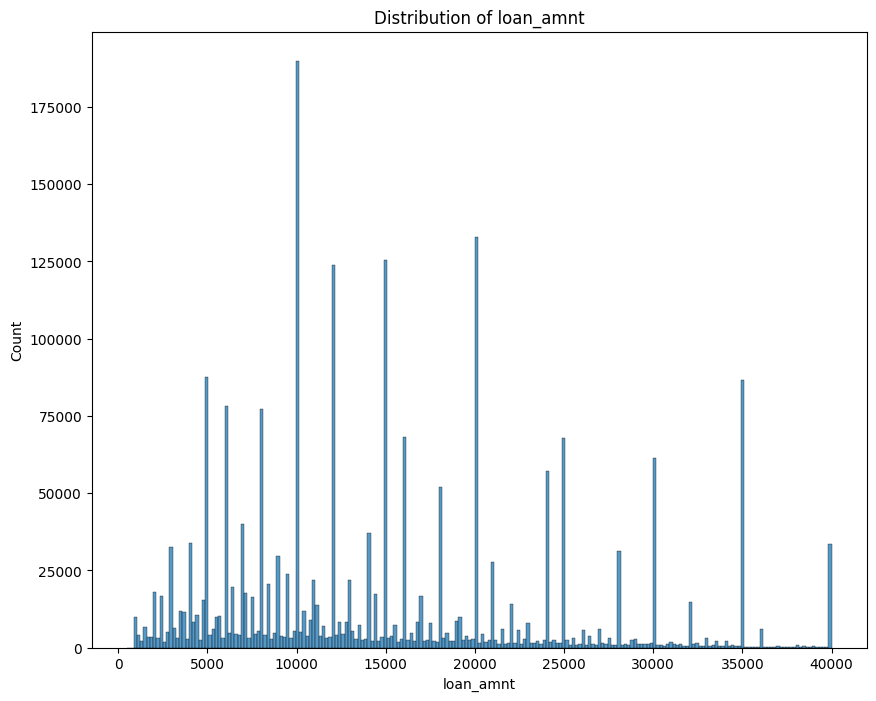

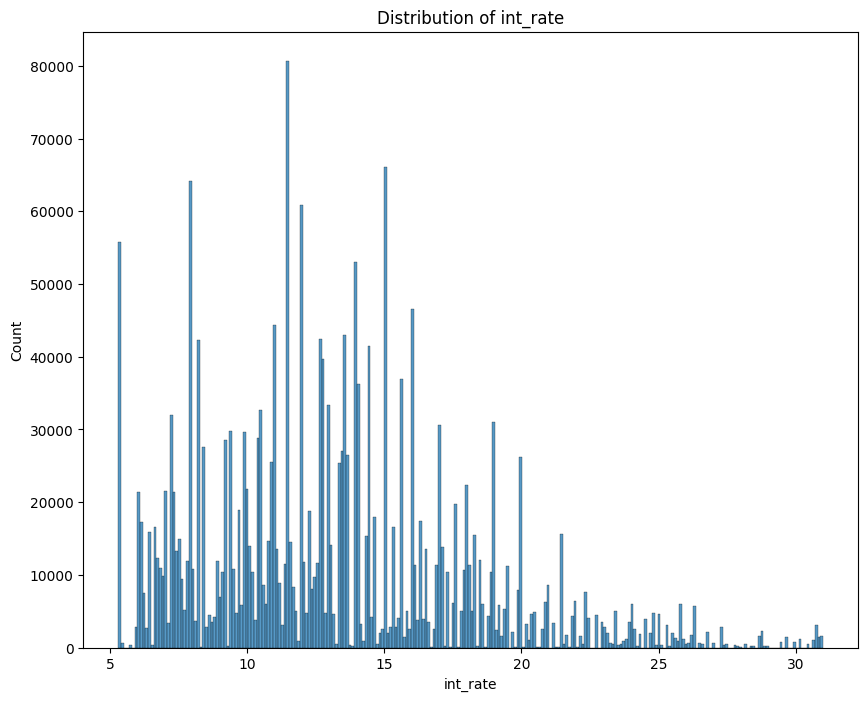

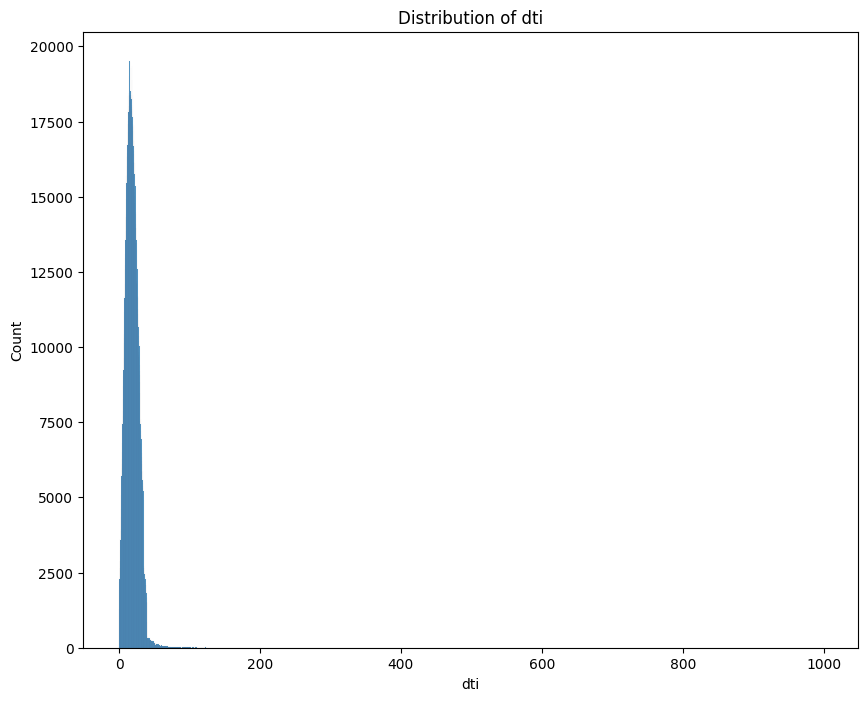


--- Categorical Variable Chart Analysis ---


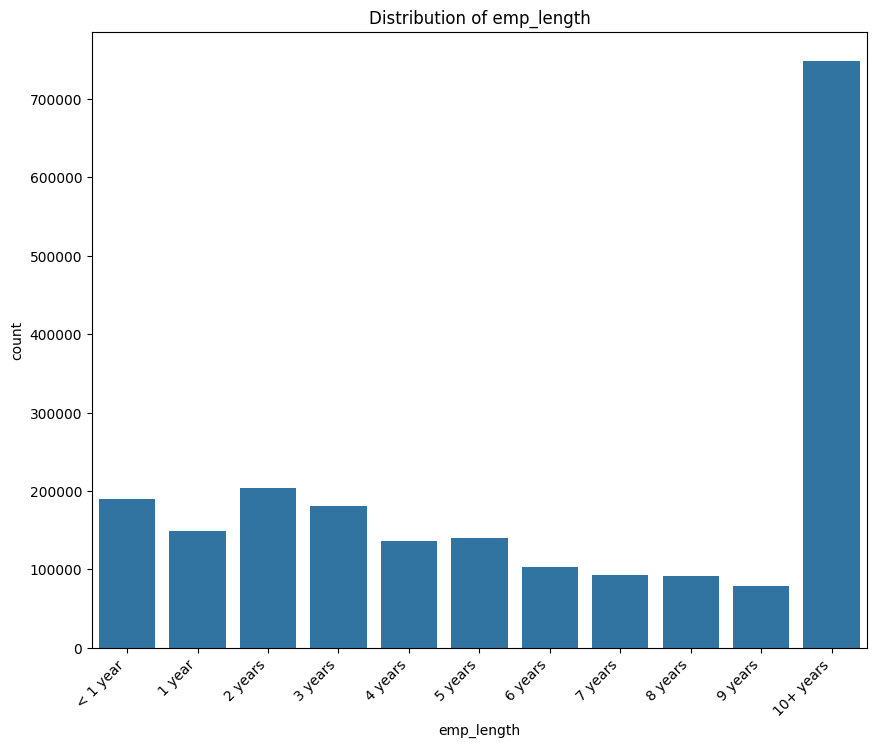

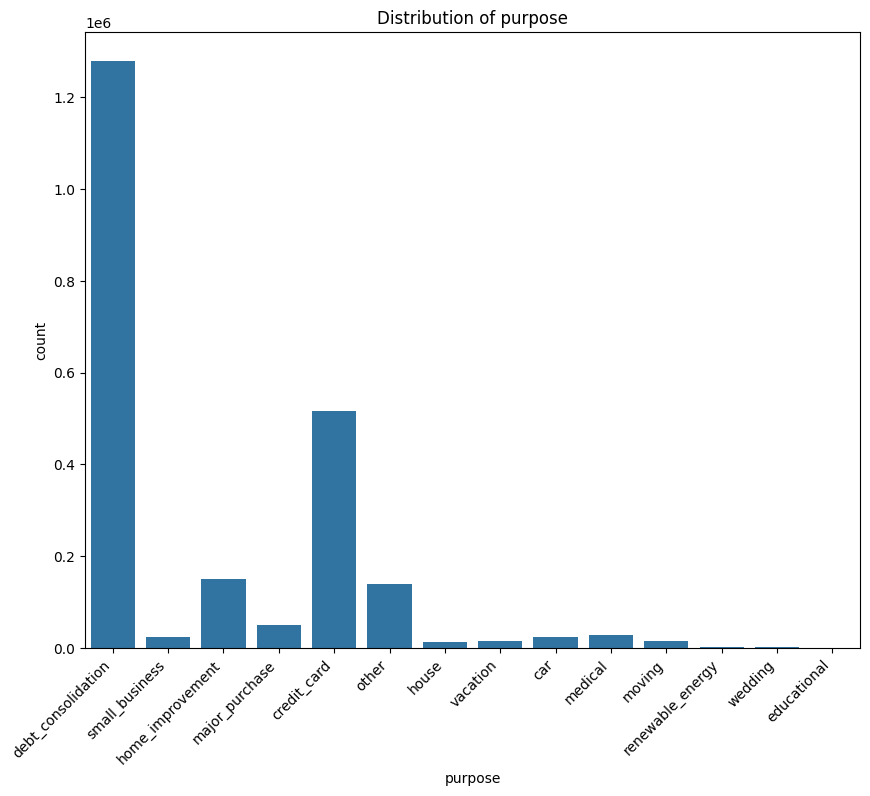

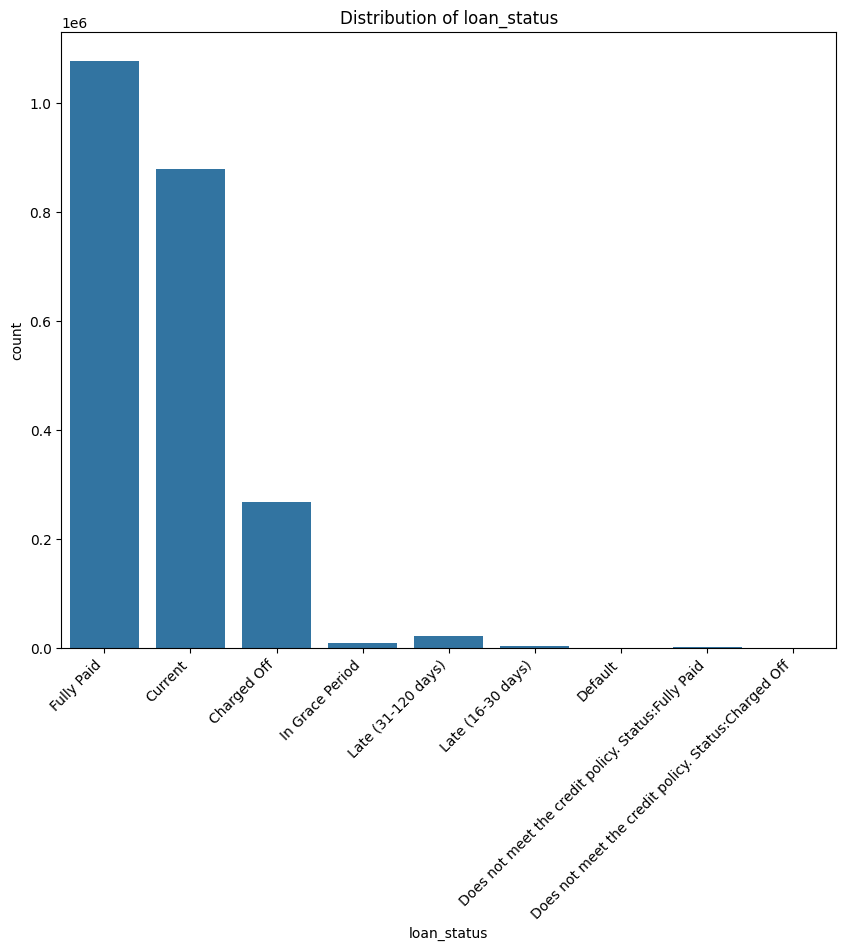




Data after handling missing values:
   loan_amnt  int_rate emp_length loan_status             purpose    dti
0     3600.0     13.99       None  Fully Paid  debt_consolidation   5.91
1    24700.0     11.99       None  Fully Paid      small_business  16.06
2    20000.0     10.78       None  Fully Paid    home_improvement  10.78
3    35000.0     14.85       None     Current  debt_consolidation  17.06
4    10400.0     22.45       None  Fully Paid      major_purchase  25.37




<ipython-input-89-eae0090a3cc5>:155: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['emp_length']=data['emp_length'].fillna('Unknown', inplace=True)


Numerical columns found:
Index(['loan_amnt', 'int_rate', 'dti'], dtype='object')

Data after scaling numerical features:
   loan_amnt  int_rate emp_length loan_status             purpose       dti
0  -1.245513  0.185875       None  Fully Paid  debt_consolidation -0.910520
1   1.050943 -0.228085       None  Fully Paid      small_business -0.194891
2   0.539410 -0.478530       None  Fully Paid    home_improvement -0.567159
3   2.171962  0.363878       None     Current  debt_consolidation -0.124385
4  -0.505423  1.936924       None  Fully Paid      major_purchase  0.461514




Categorical columns found:
Index(['emp_length', 'loan_status', 'purpose'], dtype='object')

Data after label encoding categorical data:
   loan_amnt  int_rate  emp_length  loan_status  purpose       dti  \
0  -1.245513  0.185875           0            5        2 -0.910520   
1   1.050943 -0.228085           0            5       11 -0.194891   
2   0.539410 -0.478530           0            5        4 -0.567159   
3  

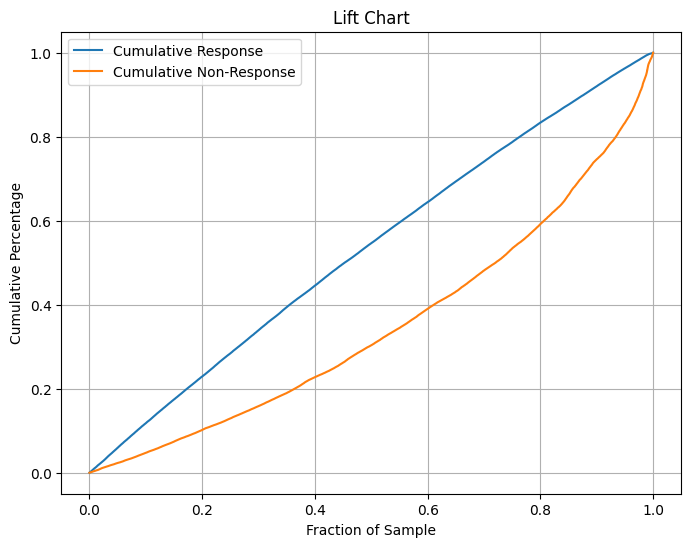

Accuracy: 0.88

Confusion Matrix:
[[397982     25]
 [ 53780      5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    398007
           1       0.17      0.00      0.00     53785

    accuracy                           0.88    451792
   macro avg       0.52      0.50      0.47    451792
weighted avg       0.80      0.88      0.83    451792



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc as pr_auc

from scipy.stats import skew
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns


# Load the dataset by URL
#url = 'https://raw.githubusercontent.com/Mun-Min/Credit_Risk_Classification/main/Resources/lending_data.csv?raw=true'
#data = pd.read_csv(url)



##TASK: 1. DATA LOADING Import the LendingClub Loan Data dataset, limiting the import to three numeric variables and three character variables.
##      This step is spelled out in more detail below. The Lending Club Loan Data dataset will be used in other projects,
##      so it is best practice to load the dataset into your Jupyter Notebook directory.

#BR: Load only a few rows of the dataset by file path (you might need to update this path) to list all columns
data_headers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/accepted_2007_to_2018Q4.csv', low_memory=False, nrows=5)
listAllColumns = data_headers.columns.tolist()
print("\n")
print("Let's list all the dataset columns.")
print(listAllColumns)

#BR: Identify all numeric and non-numeric columns
num_cols=data_headers._get_numeric_data().columns
print("\n")
print("Let's list all the numerical columns.")
print(list(num_cols))
cat_cols=set(data_headers)-set(num_cols)
print("\n")
print("Let's list all non-numerical columns.")
print(list(cat_cols))

#BR: Limiting the import to three numeric variables and three character variables (loan_status included)
selected_columns = ['loan_amnt', 'int_rate', 'emp_length', 'loan_status', 'purpose', 'dti'] #BR: I considered but did not include the following numerical columns ['annual_inc','total_acc','mths_since_last_major_derog'] and the following non-numerical columns list(cat_cols-set(['home_ownership','url','issue_d','earliest_cr_line','last_credit_pull_d','last_pymnt_d','next_pymnt_d','emp_title']))
print("\n")
print("Let's list all 6 variables.")
#BR: only using 10000 records. Please note that I have not tested this code on more than 10000 records in Colab.
data_sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/accepted_2007_to_2018Q4.csv', low_memory=False, usecols=selected_columns)
listColumns = data_sample.columns.tolist()
print(listColumns)

# Print the top and bottom 5 rows
print("\n")
print("Let's examine visually the first few rows.")
print(data_sample.head(10))
print("\n")
print("Let's examine visually the last few rows.")
print(data_sample.tail(10))


data=data_sample.copy()

print("")
##TASK: 2. DATA EXPLORATION Conduct an initial exploration of the dataset,
##      examining summary statistics and understanding the distribution of key variables.

print("\n")
print("Let's see some summary statistic about the data for numeric columns.")
print("\n")
print(data.describe())

print("\n")
print("Let's see some frequency statistic about the data for non-numeric columns.")
print("\n")
print(data['emp_length'].value_counts(normalize=True))
print("\n")
print(data['loan_status'].value_counts(normalize=True))
print("\n")
print(data['purpose'].value_counts(normalize=True))


#BR: Let's check for missing values in the dataset
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100

#BR: Missing value analysis to the target variable 'loan_status'
missing_values_target = missing_values['loan_status']
missing_percentage_target = missing_percentage['loan_status']


#BR: Formatting analysis for display
missing_data_analysis = pd.DataFrame({
    'Feature': data.columns,
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_data_analysis_target = pd.DataFrame({
    'Feature': ['loan_status'],
    'Missing Values': [missing_values_target],
    'Percentage (%)': [missing_percentage_target]
})

print("\n")
#BR: To display the analysis results
print("Missing Data Analysis for the Entire Dataset:")
print(missing_data_analysis)
print("\nMissing Data Analysis for the Target Variable 'loan_status':")
print(missing_data_analysis_target)

print("\n")
print("At first glance, it seems like we are dealing with data variables that has very different distributions.")

numerical_cols = ['loan_amnt', 'int_rate', 'dti']
print("\n--- Numerical Variable Chart Analysis ---")
for col in numerical_cols:
    plt.figure(figsize=(10, 8))
    sns.histplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()

print("\n--- Categorical Variable Chart Analysis ---")
# Order the histogram labels for 'emp_length'
ordered_labels = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
plt.figure(figsize=(10, 8))
sns.countplot(x='emp_length', data=data, order=ordered_labels)
plt.title(f'Distribution of emp_length')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

categorical_cols = ['purpose', 'loan_status']

for col in categorical_cols:
    plt.figure(figsize=(10, 8))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

print("\n")
##TASK: 3. Handling Missing Values:
##      Identify and handle missing values for numeric variables using an appropriate strategy (e.g., imputation).


#BR: Handling loan_amnt missing values, I end up dropping the records
data.dropna(subset=['loan_amnt'], inplace=True)

#BR: Handling missing values in categorical feature (int_rate)
categorical_imputer = SimpleImputer(strategy='most_frequent')
data['int_rate'] = categorical_imputer.fit_transform(data[['int_rate']])

## Handling missing values in categorical feature (emp_length)
#BR: I could use the most frequent. But it does not make sense to do that for this variable.
categorical_imputer = SimpleImputer(strategy='most_frequent') # Use most frequent value (I am aware this is not great for this particular dataset, but I wanted to demonstrate)
# data['emp_length'] = categorical_imputer.fit_transform(data[['emp_length']])

#BR: I could also drop all rows. But I would rather not drop rows for emp_length.
# data.dropna(subset=['emp_length'], inplace=True)

#BR: So I end up filling the missing values with "Unknown"
data['emp_length']=data['emp_length'].fillna('Unknown', inplace=True)
print("\nData after handling missing values:")
print(data.head())

#BR: to handle loanstatus missing values, I end up dropping the records
data.dropna(subset=['loan_status'], inplace=True)

#BR: Handling loan_amnt missing values, I end up dropping the records
data.dropna(subset=['purpose'], inplace=True)

#BR: to handle DTI missing values, I end up dropping the records
data.dropna(subset=['dti'], inplace=True)


##TASK:  Scaling Numerical Features:
##      Implement scaling on numeric features to standardize their values.

print("\n")
##BR: quick script to check for numerical columns. The following code shows there are several numerical columns.
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['number']).columns
if len(numerical_cols) > 0:
    print("Numerical columns found:")
    print(numerical_cols)
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    print("\nData after scaling numerical features:")
    print(data.head())
else:
    print("No numerical columns found.")

print("\n")
##TASK:  Encoding Categorical Variables:
##      Utilize encoding techniques (e.g., one-hot encoding) for handling categorical variables.

#BR: Here I transform 'loan_status' into a binary variable.
# Assuming 'Fully Paid' and 'Current' represent non-default, and the rest represent default.
# status_mapping = {
#     'Fully Paid': 0,
#     'Current': 0,
#     'Charged Off': 1,
#     'Late (31-120 days)': 1,
#     'In Grace Period': 1,
#     'Late (16-30 days)': 1,
#     'Does not meet the credit policy. Status:Fully Paid':1,
#     'Does not meet the credit policy. Status:Charged Off':1,
#     'Default':1
# }
#BR: Get the unique values in the 'loan_status' column
unique_loan_statuses = data['loan_status'].unique()

#BR: Create a dictionary to map loan statuses to binary values
status_mapping = {}
for status in unique_loan_statuses:
    if status in ('Fully Paid', 'Current','Late (31-120 days)','In Grace Period','Late (16-30 days)','Does not meet the credit policy. Status:Fully Paid'):
        status_mapping[status] = 0  # Non-default
    else:
        status_mapping[status] = 1  # Default

#BR: Apply the mapping to create a new binary 'loan_status' column
data['loan_status_binary'] = data['loan_status'].map(status_mapping)

# Encoding categorical variables (Gender and Loan_Status)
le = LabelEncoder()

print("\n")
##BR: quick script to check for non-numerical columns. The following code shows there are categorical variables.
categorical_cols = data.select_dtypes(exclude=["number","bool_"]).columns
if len(categorical_cols) > 0:
    print("Categorical columns found:")
    print(categorical_cols)
    # data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)  #drop_first to avoid multicollinearity
    for col in categorical_cols:
        data[col]= le.fit_transform(data[col])
    # print("\nData after creating dummy variables:")
    print("\nData after label encoding categorical data:")
    print(data.head())
else:
    print("No categorical columns found.")



##TASK: transforming loan_status target variable into a binary field


print("\n")
print(data.head(100))


# Now you can use 'loan_status_binary' in your model
# Split the data into features (independent variables) and the target variable (default or not)
X = data.drop(['loan_status', 'loan_status_binary'], axis=1)
y = data['loan_status_binary']


##TASK: Running the rest of the analysis
##      Unmodified

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict probabilities for the test data
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc_score = pr_auc(recall, precision)

# Calculate Gini coefficient
gini = 2 * roc_auc - 1

# Calculate KS statistic
ks = max(tpr - fpr)

# Print the results
print(f"ROC AUC: {roc_auc:.2f}")
print(f"PR AUC: {pr_auc_score:.2f}")
print(f"Gini: {gini:.2f}")
print(f"KS: {ks:.2f}")

# Create a lift chart
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1, len(tpr)), tpr, label='Cumulative Response')
plt.plot(np.linspace(0, 1, len(fpr)), fpr, label='Cumulative Non-Response')
plt.xlabel('Fraction of Sample')
plt.ylabel('Cumulative Percentage')
plt.title('Lift Chart')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
y_pred = (y_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("")
print("Confusion Matrix:")
print(confusion)
print("")
print("Classification Report:")
print(classification_rep)


Original Code

   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  loan_status  
0                 1       22800            0  
1                 0       13600            0  
2                 0       16100            0  
3                 1       22700            0  
4                 1       23000            0  
       loan_size  interest_rate  borrower_income  debt_to_income  \
77531    19100.0         11.261            86600        0.653580   
77532    17700.0         10.662            80900        0.629172   
77533    17600.0         10

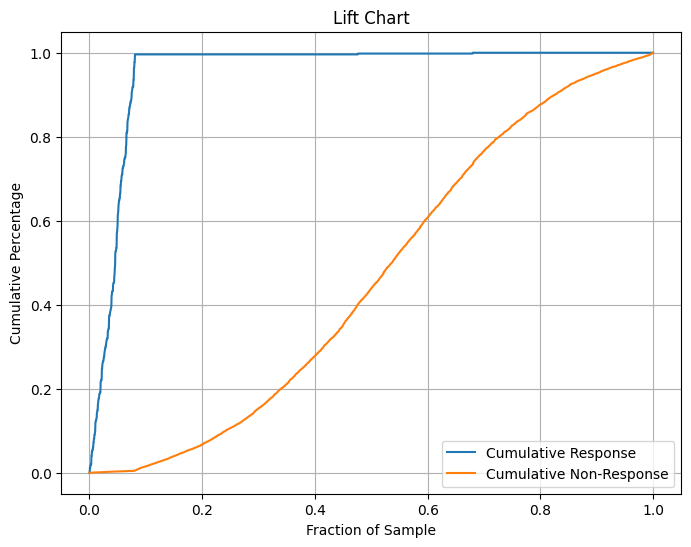

Accuracy: 0.99

Confusion Matrix:
[[14943    68]
 [   31   466]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15011
           1       0.87      0.94      0.90       497

    accuracy                           0.99     15508
   macro avg       0.94      0.97      0.95     15508
weighted avg       0.99      0.99      0.99     15508



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc as pr_auc

# Load the dataset
url = 'https://raw.githubusercontent.com/Mun-Min/Credit_Risk_Classification/main/Resources/lending_data.csv?raw=true'
data = pd.read_csv(url)

# Print the top and bottom 5 rows
print(data.head(5))
print(data.tail(5))
print("")

# Split the data into features (independent variables) and the target variable (default or not)
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict probabilities for the test data
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc_score = pr_auc(recall, precision)

# Calculate Gini coefficient
gini = 2 * roc_auc - 1

# Calculate KS statistic
ks = max(tpr - fpr)

# Print the results
print(f"ROC AUC: {roc_auc:.2f}")
print(f"PR AUC: {pr_auc_score:.2f}")
print(f"Gini: {gini:.2f}")
print(f"KS: {ks:.2f}")

# Create a lift chart
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1, len(tpr)), tpr, label='Cumulative Response')
plt.plot(np.linspace(0, 1, len(fpr)), fpr, label='Cumulative Non-Response')
plt.xlabel('Fraction of Sample')
plt.ylabel('Cumulative Percentage')
plt.title('Lift Chart')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
y_pred = (y_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("")
print("Confusion Matrix:")
print(confusion)
print("")
print("Classification Report:")
print(classification_rep)